In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t' , quoting=3)

In [3]:
data.shape

(1000, 2)

In [4]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [7]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rrushit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
corpus =[]
for i in range(0,1000):
   review =re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])

   review = review.lower()
   review_words = review.split()
   review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

   ps= PorterStemmer()
   review =[ps.stem(word) for word in review_words]

   review = ' '.join(review)
   corpus.append(review)

In [9]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X =cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=0)

In [12]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [13]:
from sklearn.naive_bayes import MultinomialNB

classifier =MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [15]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 =accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("---------SCORES--------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("recall score is {}%".format(round(score3*100,3)))

---------SCORES--------
Accuracy score is 76.5%
Precision score is 76.5%
recall score is 78.641%


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]])

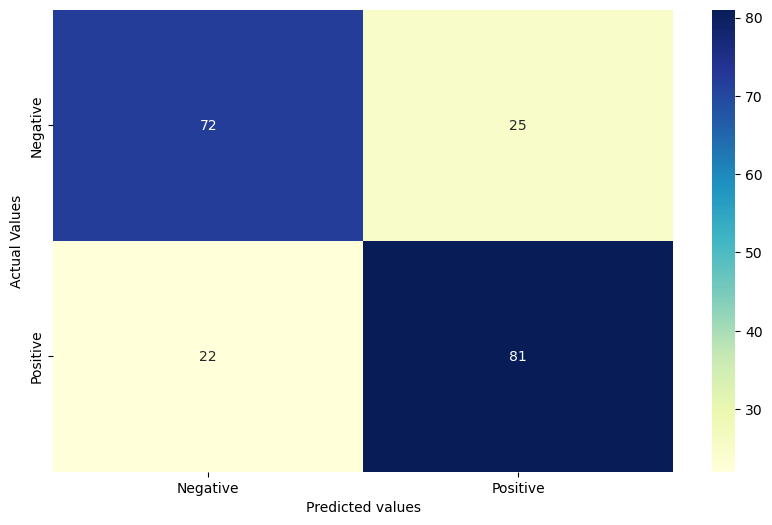

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [23]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy =0.0
alpha_val =0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier =MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred =temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy Score for alpha={} is {}%".format(round(i,1),round(score*100,3)))
  if score>best_accuracy:
     best_accuracy=score
     alpha_val =i
print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val, 1)))

Accuracy Score for alpha=0.1 is 78.0%
Accuracy Score for alpha=0.2 is 78.5%
Accuracy Score for alpha=0.3 is 78.0%
Accuracy Score for alpha=0.4 is 78.5%
Accuracy Score for alpha=0.5 is 77.5%
Accuracy Score for alpha=0.6 is 77.5%
Accuracy Score for alpha=0.7 is 77.5%
Accuracy Score for alpha=0.8 is 77.0%
Accuracy Score for alpha=0.9 is 76.5%
Accuracy Score for alpha=1.0 is 76.5%
----------------------------------------------------
The Best Accuracy Score is 78.5% with alpha value as 0.2


In [24]:
classifier =MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)